In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
# Ensures reproducibility of random numbers
rng = np.random.default_rng(123)

In [ ]:
# Build a dataset
df = pd.DataFrame({
    "name": [f"item {i}" for i in range(1, 51)],
    "value": rng.integers(low=30, high=100, size=50),
    "group": ["A"] * 10 + ["B"] * 20 + ["C"] * 12 + ["D"] * 8
})

# Show 3 first rows
df.head(3)

In [3]:
### read the index  

index = pd.read_csv('Data/index.csv')
index.head(3)

,country,Area
0,AT,West-Central
1,BE,West
2,BG,East-Central


In [4]:
### input my data 

d = pd.read_csv('Data/Deaths.csv').drop('Unnamed: 0', axis =1)
d.head(3)

,country,D_first_wave,D_second_wave,D_third_wave
0,AT,9697.0,7355.0,1856.0
1,BE,24015.0,12406.0,2023.0
2,BG,17459.0,13783.0,10664.0


In [5]:
ds = pd.merge(d, index, on = 'country')
df = ds[['country', 'D_first_wave', 'Area']]
df.columns = ['name', 'value', 'group']
df = df.sort_values(by = 'group')
df['value'] = df['value'] / 1000
df

,name,value,group
15,IE,4.503,Brithish isles
31,UK,118.531,Brithish isles
2,BG,17.459,East-Central
29,SI,4.447,East-Central
5,CZ,26.071,East-Central
27,RO,33.639,East-Central
25,PL,63.030,East-Central
8,EE,1.106,East-Central
21,LV,2.321,East-Central
19,LT,8.088,East-Central


In [6]:
E = df.groupby('group').size().tolist()

In [7]:
def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

In [8]:
def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 4
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        ) 

In [9]:
GREY60 = "#999999"

findfont: Font family ['Roboto Mono'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto Mono'] not found. Falling back to DejaVu Sans.


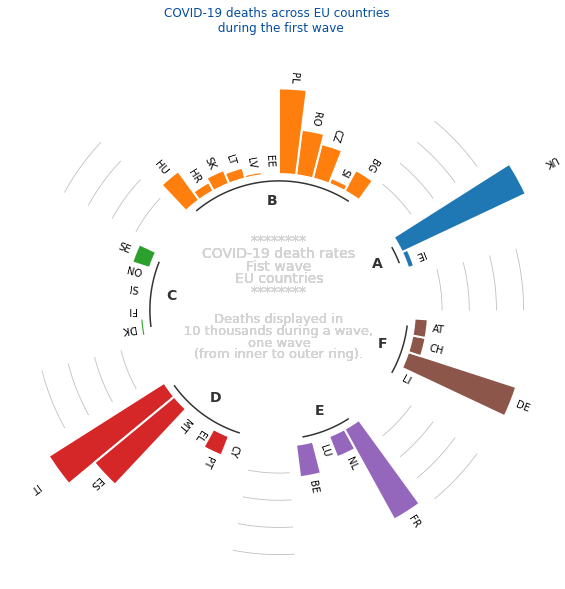

In [10]:
# All this part is like the code above
VALUES = df["value"].values
LABELS = df["name"].values
GROUP = df["group"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

offset = 0
OFFSET = 0
IDXS = []
GROUPS_SIZE = [2, 11, 5, 6, 4, 4]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [2, 11, 5, 6, 4, 4]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0 
for group, size in zip(["A", "B", "C", "D", 'E', 'F'], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")
    
    ax.text(x=0.5, y=0.58,
           s="********\nCOVID-19 death rates\nFist wave\nEU countries\n********",
    color= '#D3D3D3', va="center", ha="center", ma="center", fontfamily="Roboto Mono",
    fontsize=14, fontweight="light", linespacing=0.87, transform=ax.transAxes
)
    ax.text(
    x=0.5, y=0.45, s="Deaths displayed in\n10 thousands during a wave,\none wave\n(from inner to outer ring).",
    color='#D3D3D3', va="center", ha="center",  ma="center", fontfamily="Roboto Mono",
    fontsize=13, linespacing=0.87, transform=ax.transAxes, fontweight = 'light',
)
    
    # Add text to indicate group
    ax.text(
        np.mean(x1), -20, group, color="#333333", fontsize=14, 
        fontweight="bold", ha="center", va="center"
    )
    
    # Add reference lines at 20, 40, 60, and 80
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [60] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [80] * 50, color="#bebebe", lw=0.8)
    
    offset += size + PAD
    
plt.title('COVID-19 deaths across EU countries \n during the first wave',  color = '#054ea2')

plt.savefig('Figures/deaths_One.png', dpi = 400)
plt.show()

### Second wave 

In [11]:
df = ds[['country', 'D_second_wave', 'Area']]
df.columns = ['name', 'value', 'group']
df.sort_values(by = 'group', inplace = True)
df['value'] =  df['value'] / 1000
df

C:\Users\Mohamed\AppData\Local\Temp/ipykernel_8828/1660076906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by = 'group', inplace = True)
C:\Users\Mohamed\AppData\Local\Temp/ipykernel_8828/1660076906.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['value'] =  df['value'] / 1000


,name,value,group
15,IE,2.84900,Brithish isles
31,UK,73.19300,Brithish isles
2,BG,13.78300,East-Central
29,SI,3.52500,East-Central
5,CZ,21.92100,East-Central
27,RO,24.70575,East-Central
25,PL,50.76400,East-Central
8,EE,0.91300,East-Central
21,LV,1.87100,East-Central
19,LT,6.63500,East-Central


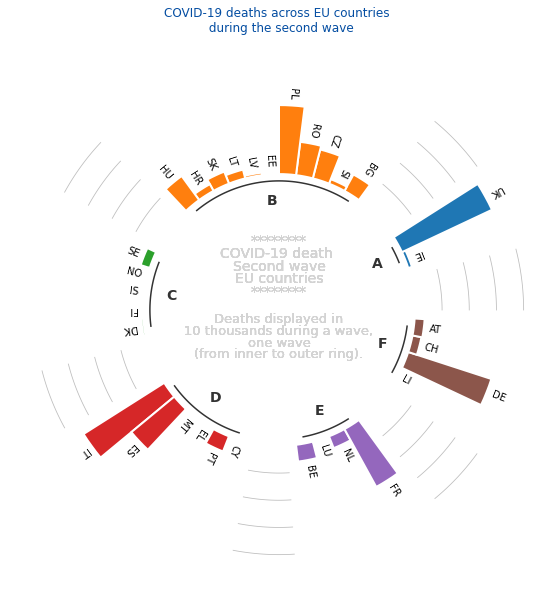

In [13]:
# All this part is like the code above
VALUES = df["value"].values
LABELS = df["name"].values
GROUP = df["group"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

offset = 0
IDXS = []
GROUPS_SIZE = [2, 11, 5, 6, 4, 4]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [2, 11, 5, 6, 4, 4]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0 
for group, size in zip(["A", "B", "C", "D", 'E', 'F'], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")
    
    ax.text(x=0.5, y=0.58,
           s="********\nCOVID-19 death \nSecond wave\nEU countries\n********",
    color= '#D3D3D3', va="center", ha="center", ma="center", fontfamily="Roboto Mono",
    fontsize=14, fontweight="light", linespacing=0.87, transform=ax.transAxes
)
    ax.text(
    x=0.5, y=0.45, s="Deaths displayed in\n10 thousands during a wave,\none wave\n(from inner to outer ring).",
    color='#D3D3D3', va="center", ha="center",  ma="center", fontfamily="Roboto Mono",
    fontsize=13, linespacing=0.87, transform=ax.transAxes, fontweight = 'light',
)
    
    # Add text to indicate group
    ax.text(
        np.mean(x1), -20, group, color="#333333", fontsize=14, 
        fontweight="bold", ha="center", va="center"
    )
    
    # Add reference lines at 20, 40, 60, and 80
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [60] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [80] * 50, color="#bebebe", lw=0.8)
    
    offset += size + PAD

plt.title('COVID-19 deaths across EU countries \n during the second wave',  color = '#054ea2')

plt.savefig('Figures/deaths_Seond.png', dpi = 400)

### Third wave

In [14]:
df = ds[['country', 'D_third_wave', 'Area']]
df.columns = ['name', 'value', 'group']
df.sort_values(by = 'group', inplace = True)
df['value'] =  df['value'] / 1000
df

C:\Users\Mohamed\AppData\Local\Temp/ipykernel_8828/1046142238.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by = 'group', inplace = True)
C:\Users\Mohamed\AppData\Local\Temp/ipykernel_8828/1046142238.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['value'] =  df['value'] / 1000


,name,value,group
15,IE,0.99700,Brithish isles
31,UK,24.06000,Brithish isles
2,BG,10.66400,East-Central
29,SI,0.93500,East-Central
5,CZ,5.43200,East-Central
27,RO,21.08125,East-Central
25,PL,16.24500,East-Central
8,EE,0.53600,East-Central
21,LV,1.78800,East-Central
19,LT,4.07900,East-Central


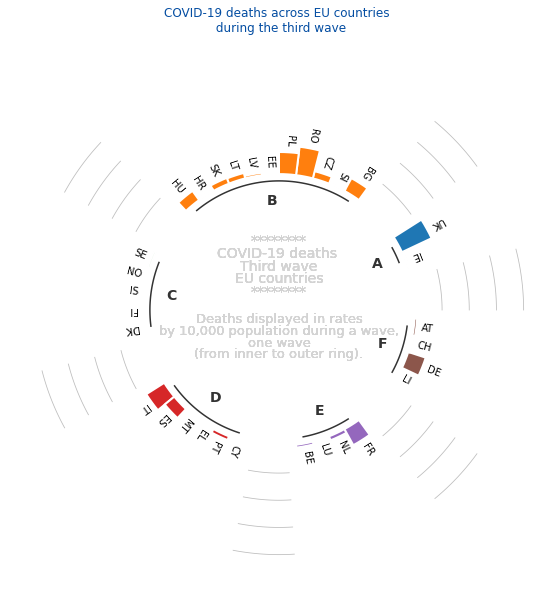

In [16]:
# All this part is like the code above
VALUES = df["value"].values
LABELS = df["name"].values
GROUP = df["group"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

offset = 0
IDXS = []
GROUPS_SIZE = [2, 11, 5, 6, 4, 4]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [2, 11, 5, 6, 4, 4]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0 
for group, size in zip(["A", "B", "C", "D", 'E', 'F'], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")
    
    ax.text(x=0.5, y=0.58,
           s="********\nCOVID-19 deaths \nThird wave\nEU countries\n********",
    color= '#D3D3D3', va="center", ha="center", ma="center", fontfamily="Roboto Mono",
    fontsize=14, fontweight="light", linespacing=0.87, transform=ax.transAxes
)
    ax.text(
    x=0.5, y=0.45, s="Deaths displayed in rates\nby 10,000 population during a wave,\none wave\n(from inner to outer ring).",
    color='#D3D3D3', va="center", ha="center",  ma="center", fontfamily="Roboto Mono",
    fontsize=13, linespacing=0.87, transform=ax.transAxes, fontweight = 'light',
)
    
    
    
    # Add text to indicate group
    ax.text(
        np.mean(x1), -20, group, color="#333333", fontsize=14, 
        fontweight="bold", ha="center", va="center"
    )
    
    # Add reference lines at 20, 40, 60, and 80
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [60] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [80] * 50, color="#bebebe", lw=0.8)
    
    offset += size + PAD
    
plt.title('COVID-19 deaths across EU countries \n during the third wave',  color = '#054ea2')

plt.savefig('Figures/deaths_Third.png', dpi = 400)